<script type="text/javascript" async
  src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-MML-AM_CHTML">
</script>
# Flux

The luminosity of an object can be though of as the total amount of energy radiating spherically from the source across all wavelengths per unit time (units: J s$^{-1}$ or W).

However, astronomers are at large distances from their sources, where it is impossible to collect and measure all this energy. We only ever see a fraction of this energy depending on how far away from the source we are and how large our detector is.

We call this the Flux, and it has units of J s$^{-1}$ m$^{-2}$ (or W m$^{-2}$). Flux follows the inverse sqaure law, hence when we are 2x further from a source we collect 4x less energy.

For every square meter (or cm) of the detector located at R meters (or cm) from a spherically radiating source of luminosity L, we measure flux of

\begin{equation*}
\mathrm{F} = \frac{\mathrm{L}}{4 \pi \mathrm{R}^{2}}
\end{equation*}

However, I previously said that the luminosity is measured across all wavelengths thus, our above calculation of flux is also across all wavelengths. This is known as _bolometric flux_ and, from an engineering perspective, it is impossible to build a detector to measure this. In reality astronomers will use a detector to operate across a certain wavelength (energy) range. Bolometric flux is

\begin{equation*}
\mathrm{F}_{\mathrm{bolometric}} = \int_{0}^{\infty} \mathrm{F}_{\nu}\  \mathrm{d}\nu =  \int_{0}^{\infty} \mathrm{F}_{\lambda}\  \mathrm{d}\lambda
\end{equation*}


where $\mathrm{F}_{\nu}$ is in frequency units of W m$^{-2}$ Hz$^{-1}$ and $\mathrm{F}_{\lambda}$ is in wavelength units of W m$^{-2}$ A$^{-1}$ (A is the unit of angstrom, 1A = 10$^{-10}$m)

We can calculate our flux through a certain frequency or wavelength range by changing the limits of our integration. This is useful in the context of real-world measurement where our detectors have a known sensitivity window.

## Converting units

Sometimes we are given measurements in one unit and require a conversion to a different one.

\begin{equation*}
\mathrm{F}_{\nu}\  \mathrm{d}\nu =  \mathrm{F}_{\lambda}\  \mathrm{d}\lambda
\end{equation*}

we also know that

\begin{equation*}
\mathrm{c} =  \lambda\nu
\end{equation*}

therefore:

\begin{equation*}
\mathrm{F}_{\lambda} =  \mathrm{F}_{\nu}\  \frac{\lambda^{2}}{c}
\end{equation*}

and

\begin{equation*}
\mathrm{F}_{\nu} =  \mathrm{F}_{\lambda}\  \frac{c}{\lambda^{2}}
\end{equation*}

## cgs units

The centimeter-gram-second units are an SI system. I don't know much about the origin, only that astronomers like it and you have to get used to it. Your friends from other STEM disciplines will mock you for measuring the speed of light in cm/s, and literally no-one educated this side of the Cold-War will know what an erg is. So here are some useful conversions:

| Quantity            	| Quantity symbol 	| CGS unit name         	| Unit    	| Unit definition    	| Unit definition 	|
|---------------------	|-----------------	|-----------------------	|---------	|--------------------	|-----------------	|
| length, position    	| L, x            	| centimetre            	| cm      	| 1/100 of metre     	| = 10−2 m        	|
| mass                	| m               	| gram                  	| g       	| 1/1000 of kilogram 	| = 10−3 kg       	|
| time                	| t               	| second                	| s       	| 1 second           	| = 1 s           	|
| velocity            	| v               	| centimetre per second 	| cm/s    	| cm/s               	| = 10−2 m/s      	|
| acceleration        	| a               	| gal                   	| Gal     	| cm/s2              	| = 10−2 m/s2     	|
| force               	| F               	| dyne                  	| dyn     	| g⋅cm/s2            	| = 10−5 N        	|
| energy              	| E               	| erg                   	| erg     	| g⋅cm2/s2           	| = 10−7 J        	|
| power               	| P               	| erg per second        	| erg/s   	| g⋅cm2/s3           	| = 10−7 W        	|
| pressure            	| p               	| barye                 	| Ba      	| g/(cm⋅s2)          	| = 10−1 Pa       	|
| dynamic viscosity   	| μ               	| poise                 	| P       	| g/(cm⋅s)           	| = 10−1 Pa⋅s     	|
| kinematic viscosity 	| ν               	| stokes                	| St      	| cm2/s              	| = 10−4 m2/s     	|
| wavenumber          	| k               	| kayser (K)            	| cm−1[8] 	| cm−1               	| = 100 m−1       	|

**Important Note:** Astronomers are always using the Jansky (Jy), which is a unit of spectral flux density.

1Jy = 10$^{-26}$ W m$^{-2}$ Hz$^{-1}$

or in cgs units:

1Jy = 10$^{-23}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$

In [1]:
## Here we load up some modules we will need for this work
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## F_nu is our reference specrtral flux density
F_nu = 3631e-23*(u.erg/u.s/u.cm**2/u.Hz) #in cgs erg/s/cm^2/Hz

## The wavelength range we will perform our calculations over
## strictly speaking this should be 0 to infinty, but who has time for that?
## np.linspace(lower, upper, num_steps)
wavelength = np.linspace(1000,13000,10000)*u.AA #u.AA tells astropy these are in units of angstrom

In [3]:
## Converting F_nu to F_lambda
F_lam = (F_nu*const.c.cgs/((wavelength)**2.)).to(u.erg/u.s/u.cm**2/u.AA)

In [4]:
F_lam

<Quantity [1.08854641e-07, 1.08593834e-07, 1.08333962e-07, ...,
           6.44348220e-10, 6.44229246e-10, 6.44110305e-10] erg / (Angstrom cm2 s)>

In [5]:
## Converting to Photon counts - 
F_cnt = (F_lam.value*wavelength.value)/(const.c.cgs.value*const.h.cgs.value)

In [6]:
F_cnt2 = ((F_lam*wavelength)/(const.c.cgs*const.h.cgs)).to(1/u.s/u.cm**2/u.AA)

In [7]:
F_cnt[0]

547986963325.2474

In [8]:
F_cnt2[0]

<Quantity 5479.86963325 1 / (Angstrom cm2 s)>

In [9]:
F_cnt[0]/F_cnt2[0]

<Quantity 1.e+08 Angstrom cm2 s>

In [10]:
## We are loading up our filters here, I'm using the DES filters for this demo
## The first column MUST be wavelngth
## The second column MUST be the system transmission fraction
desg_w, desg_t = np.loadtxt('./filters/DES_20130322_g.fil', unpack=True, dtype=float,skiprows=1)
desr_w, desr_t = np.loadtxt('./filters/DES_20130322_r.fil', unpack=True, dtype=float,skiprows=1)
desi_w, desi_t = np.loadtxt('./filters/DES_20130322_i.fil', unpack=True, dtype=float,skiprows=1)
desz_w, desz_t = np.loadtxt('./filters/DES_20130322_z.fil', unpack=True, dtype=float,skiprows=1)

In [11]:
## In this cell I perform an interpolation to get the 
## DES transmission funciton onto the wavelength space.
## The np.interp function takes my known values for the
## DES filter range (desg_w) and transmission function (desg_t)
## and then maps that onto our previously defined wavelength
## range. We have to do this because our F_lam is also defined
## over this rage, so we can multiply F_lam by our transmission
## function. So filt_int is 0 everywhere outside the filter and
## scaled accordingly inside the filter
## np.trapz then integrates through the filter to get the total
## flux. Easy!

## g
# filt_int = np.interp(wavelength, desg_w,desg_t)
# filtspec = filt_int*F_lam
# fluxg = np.trapz(filtspec,wavelength)

# ##r
# filt_int = np.interp(wavelength, desr_w,desr_t)
# filtspec = filt_int*F_lam
# fluxr = np.trapz(filtspec,wavelength)

# ##i
# filt_int = np.interp(wavelength, desi_w,desi_t)
# filtspec = filt_int*F_lam
# fluxi = np.trapz(filtspec,wavelength)

# ##z
# filt_int = np.interp(wavelength, desz_w,desz_t)
# filtspec = filt_int*F_lam
# fluxz = np.trapz(filtspec,wavelength)

## Rather than define this for each filter I should write a generic function to do it.
## A job for V2

def fluxLamFilter(wave, filt_wave, fil_trans, F_lam=F_lam):
    filt_int = np.interp(wave, filt_wave, fil_trans, left=0, right=0)
    filtspec = filt_int*F_lam
    fluxFilt = np.trapz(filtspec,wave)
    if type(fluxFilt)==u.quantity.Quantity:
        return fluxFilt.value
    else: return float(fluxFilt)

def countFilter(wave, filt_wave, fil_trans, F_cnt=F_cnt):
    filt_int = np.interp(wave, filt_wave, fil_trans)
    filtspec = filt_int*F_cnt
    countFilt = np.trapz(filtspec,wave)
    if type(countFilt)==u.quantity.Quantity:
        return countFilt.value
    else: return float(countFilt)

In [13]:
fluxg = fluxLamFilter(wavelength,desg_w,desg_t)
fluxr = fluxLamFilter(wavelength,desr_w,desr_t)
fluxi = fluxLamFilter(wavelength,desi_w,desi_t)
fluxz = fluxLamFilter(wavelength,desz_w,desz_t)

#fluxSDSSr = fluxLamFilter(wavelength,sdssr.wave,sdssr.trans)
#fluxB = fluxLamFilter(wavelength,B.wave,B.trans)

In [14]:
countFilter(wavelength,desg_w,desg_t)

52842417741185.38

In [15]:
## This just creates a dictionary of my preferred colours for the DES filters.
## This is different to mat_smith_c, which is mainly purple and mustard colours.
mat_c = {'g':'#4CAF50','r':'#FF9800','i':'#f44336','z':'#607D8B'}

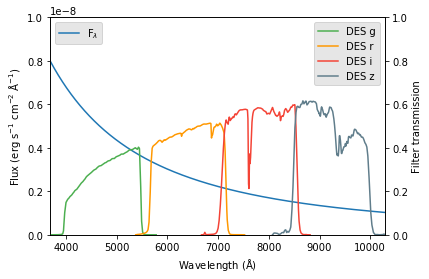

In [16]:
## Plotting it all up

ax1 = plt.subplot(111)
ax1.plot(wavelength,F_lam, label=r'F$_\lambda$')
#ax1.set_xscale('log')
legend=ax1.legend(loc=2, frameon=True)
frame=legend.get_frame()
frame.set_facecolor('#E0E0E0')
ax1.set_ylabel(r'Flux (erg s$^{-1}$ cm$^{-2}$ $\mathrm{\AA}^{-1}$)')
ax1.set_xlabel(r'Wavelength ($\mathrm{\AA}$)')

ax2 = plt.twinx(ax1)
ax2.plot(desg_w,desg_t, label='DES g',c=mat_c['g'])
ax2.plot(desr_w,desr_t, label='DES r',c=mat_c['r'])
ax2.plot(desi_w,desi_t, label='DES i',c=mat_c['i'])
ax2.plot(desz_w,desz_t, label='DES z',c=mat_c['z'])
ax2.set_ylim(0,1)
ax2.set_ylabel('Filter transmission')

ax2.set_xlim(min(desg_w),max(desz_w))
ax1.set_ylim(0,1e-8)
legend=ax2.legend(loc=1, frameon=True)
frame=legend.get_frame()
frame.set_facecolor('#E0E0E0')

# SDSS Filters

In [22]:
sdssu_w, sdssu_t = np.loadtxt('../pycoco_filters/SDSS_u.dat', unpack=True, dtype=float)
sdssg_w, sdssg_t = np.loadtxt('../pycoco_filters/SDSS_g.dat', unpack=True, dtype=float)
sdssr_w, sdssr_t = np.loadtxt('../pycoco_filters/SDSS_r.dat', unpack=True, dtype=float)
sdssi_w, sdssi_t = np.loadtxt('../pycoco_filters/SDSS_i.dat', unpack=True, dtype=float)
sdssz_w, sdssz_t = np.loadtxt('../pycoco_filters/SDSS_z.dat', unpack=True, dtype=float)

In [23]:
flux_sdssg = fluxLamFilter(wavelength,sdssg_w, sdssg_t)
flux_sdssr = fluxLamFilter(wavelength,sdssr_w, sdssr_t)
flux_sdssi = fluxLamFilter(wavelength,sdssi_w, sdssi_t)
flux_sdssz = fluxLamFilter(wavelength,sdssz_w, sdssz_t)

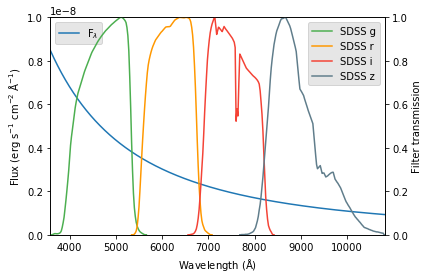

In [24]:
## Plotting it all up

ax1 = plt.subplot(111)
ax1.plot(wavelength,F_lam, label=r'F$_\lambda$')
#ax1.set_xscale('log')
legend=ax1.legend(loc=2, frameon=True)
frame=legend.get_frame()
frame.set_facecolor('#E0E0E0')
ax1.set_ylabel(r'Flux (erg s$^{-1}$ cm$^{-2}$ $\mathrm{\AA}^{-1}$)')
ax1.set_xlabel(r'Wavelength ($\mathrm{\AA}$)')

ax2 = plt.twinx(ax1)
ax2.plot(sdssg_w, sdssg_t, label='SDSS g',c=mat_c['g'])
ax2.plot(sdssr_w, sdssr_t, label='SDSS r',c=mat_c['r'])
ax2.plot(sdssi_w, sdssi_t, label='SDSS i',c=mat_c['i'])
ax2.plot(sdssz_w, sdssz_t, label='SDSS z',c=mat_c['z'])
ax2.set_ylim(0,1)
ax2.set_ylabel('Filter transmission')

ax2.set_xlim(min(sdssg_w),max(sdssz_w))
ax1.set_ylim(0,1e-8)
legend=ax2.legend(loc=1, frameon=True)
frame=legend.get_frame()
frame.set_facecolor('#E0E0E0')